Q1: Linear Regression Model


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv("Food_delivery_times.csv")

# Check for null values and drop them
print(df.isnull().sum())
df = df.dropna()

# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"], drop_first=True)

# Split data into features (X) and target (y)
X = df.drop(columns=["Order_ID", "Delivery_Time_min"])
y = df["Delivery_Time_min"]

# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


Step 2: Build and train the linear regression model


In [2]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Report coefficient values
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coefficients)

                   Feature  Coefficient
0              Distance_km     2.962396
1     Preparation_Time_min     0.924030
2   Courier_Experience_yrs    -0.606126
3            Weather_Foggy     8.144161
4            Weather_Rainy     4.496523
5            Weather_Snowy     8.780243
6            Weather_Windy     2.853653
7        Traffic_Level_Low   -12.846171
8     Traffic_Level_Medium    -7.482864
9      Time_of_Day_Evening     1.119993
10     Time_of_Day_Morning    -0.068551
11       Time_of_Day_Night    -0.684577
12        Vehicle_Type_Car     1.079177
13    Vehicle_Type_Scooter    -0.709768


Step 3: Evaluate the model


In [3]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RSS, Adjusted R-squared, and MSE
rss = np.sum((y_test - y_pred) ** 2)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
adjusted_r_squared = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"RSS: {rss}")
print(f"MSE: {mse}")
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")

RSS: 18783.5235550768
MSE: 70.88122096255397
R-squared: 0.8322833793910046
Adjusted R-squared: 0.8228912486369009


Step 4: Analyze the relationship between distance and delivery time


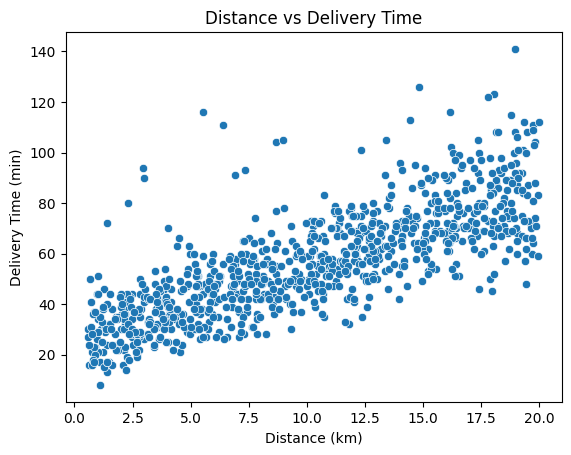

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship
sns.scatterplot(x=df["Distance_km"], y=df["Delivery_Time_min"])
plt.title("Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.show()

Step 5: Difference between linear and logistic regression


Linear Regression: Used for predicting continuous values (e.g., delivery time). It models the relationship between dependent and independent variables using a straight line.

Logistic Regression: Used for classification tasks (e.g., predicting traffic level). It predicts the probability of a binary outcome using a sigmoid function.

Q2: Ridge and Lasso Regression


Step 1: Preprocess the data


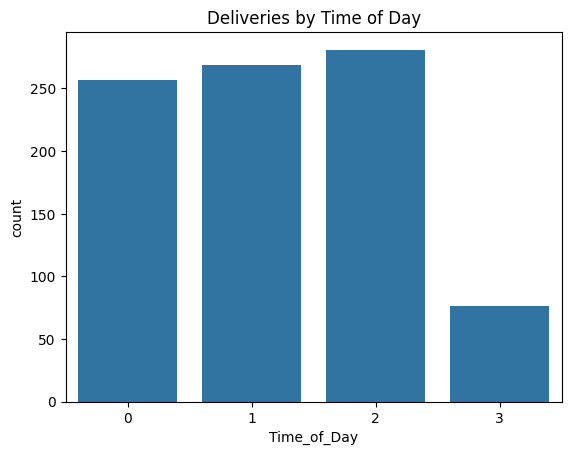

In [7]:
# Load the dataset again (if needed)
df = pd.read_csv("Food_delivery_times.csv")

# Check for null values and drop them
df = df.dropna()

# Apply label encoding to categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Plot bar chart for deliveries during different times of the day
sns.countplot(x="Time_of_Day", data=df)
plt.title("Deliveries by Time of Day")
plt.show()

Step 2: Check for outliers and plot histogram


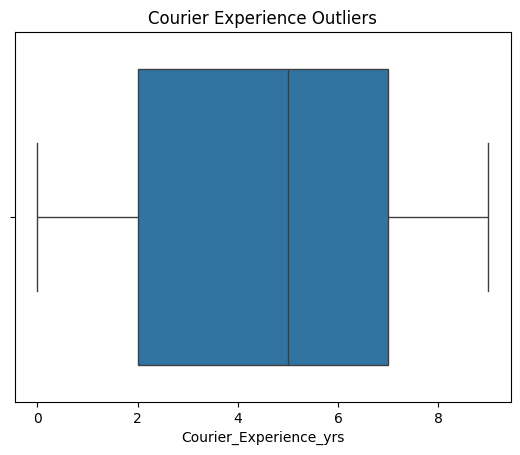

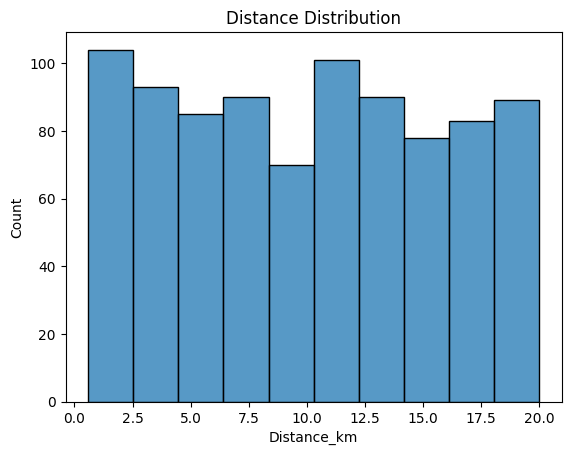

In [8]:
# Check for outliers in courier experience
sns.boxplot(x=df["Courier_Experience_yrs"])
plt.title("Courier Experience Outliers")
plt.show()

# Plot histogram for distance
sns.histplot(df["Distance_km"], bins=10)
plt.title("Distance Distribution")
plt.show()

Step 3: Split the data


In [9]:
# Split data into 60% training and 40% testing
X = df.drop(columns=["Order_ID", "Delivery_Time_min"])
y = df["Delivery_Time_min"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Step 4: Train Ridge and Lasso models


In [10]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

Step 5: Evaluate models


In [11]:
# Calculate MSE and R-squared for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Calculate MSE and R-squared for Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Ridge - MSE: {mse_ridge}, R-squared: {r2_ridge}")
print(f"Lasso - MSE: {mse_lasso}, R-squared: {r2_lasso}")

Ridge - MSE: 110.50033796663526, R-squared: 0.7566331286744594
Lasso - MSE: 109.23503971681833, R-squared: 0.7594198321544489


Step 6: Apply cross-validation on the underperforming model


In [12]:
from sklearn.model_selection import cross_val_score

# Example: Cross-validation for Ridge
scores = cross_val_score(ridge, X, y, cv=5, scoring="neg_mean_squared_error")
print(f"Cross-validated MSE for Ridge: {-scores.mean()}")

Cross-validated MSE for Ridge: 125.3891104231243


Q3: Logistic Regression Model


In [13]:
# Load the dataset again (if needed)
df = pd.read_csv("Food_delivery_times.csv")

# Drop null values
df = df.dropna()

# Apply label encoding to categorical variables
for column in ["Weather", "Time_of_Day", "Vehicle_Type"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Apply standard scaler to distance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["Distance_km"] = scaler.fit_transform(df[["Distance_km"]])

# Split data into features (X) and target (y)
X = df.drop(columns=["Order_ID", "Traffic_Level"])
y = df["Traffic_Level"]

Step 2: Generate a pie chart for time of the day


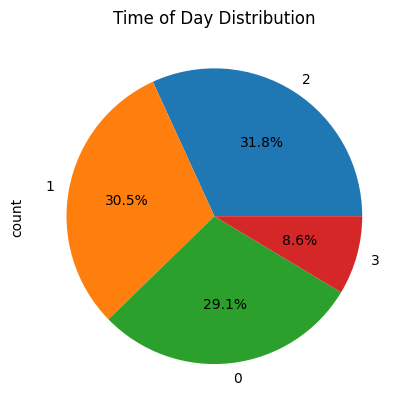

In [14]:
df["Time_of_Day"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Time of Day Distribution")
plt.show()

Step 3: Create a heatmap for correlation


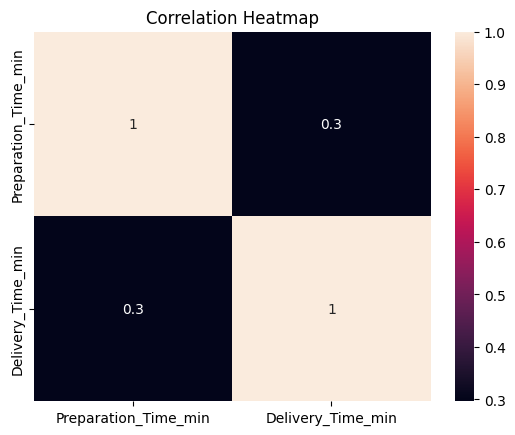

In [15]:
sns.heatmap(df[["Preparation_Time_min", "Delivery_Time_min"]].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

Step 4: Train and evaluate the logistic regression model


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy, precision, recall, and AUC
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
auc = roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class="ovr")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")

Accuracy: 0.43018867924528303
Precision: 0.4424593363695511
Recall: 0.43018867924528303
AUC: 0.5920064398980062


c:\Users\hadan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Step 5: Discuss predictor significance


In [18]:
# Check p-values of predictors
import statsmodels.api as sm

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Add a constant to the features
X_with_const = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y_encoded, X_with_const)
result = logit_model.fit()

# Print the summary
print(result.summary())

ValueError: endog must be in the unit interval.